## Multiple linear regression Project
### California Housing price prediction using linear/polynomial regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
print(type(california))
print(california)

<class 'sklearn.utils._bunch.Bunch'>
{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DE

In [4]:
print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
x = california['data']
y = california['target']

In [7]:
# Converting data as dataframe
column_name = california['feature_names']+california['target_names']
data = pd.DataFrame(np.concatenate([x,y.reshape(len(y),1)],axis=1),columns=column_name)

In [8]:
## Train-test split
## But since median_income is an important feature we will stratify this data based on that

data['MedInc_bin'] = pd.cut(
    data['MedInc'],
    bins = [0,3,6,9,12,np.inf],
    labels = [1,2,3,4,5]
)

<Axes: >

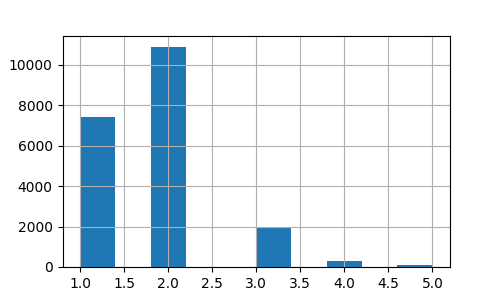

In [9]:
plt.figure(figsize=(5,3))
data['MedInc_bin'].hist()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=data['MedInc_bin'])

### EDA

In [11]:
data = data.drop('MedInc_bin',axis=1)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
data.corr('spearman')['MedHouseVal']

MedInc         0.676778
HouseAge       0.074855
AveRooms       0.263367
AveBedrms     -0.125187
Population     0.003839
AveOccup      -0.256594
Latitude      -0.165739
Longitude     -0.069667
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

### Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

## Model Selection

#### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
Linear_regressor = LinearRegression()
Linear_regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
## Weights
Linear_regressor.intercept_, Linear_regressor.coef_

(np.float64(2.071417315891355),
 array([ 0.83294447,  0.11578701, -0.25568477,  0.28353869, -0.00667563,
        -0.04149605, -0.88899541, -0.86289553]))

In [16]:
from sklearn.model_selection import cross_val_score

nrsme_score = cross_val_score(Linear_regressor,x_train,y_train,scoring='neg_root_mean_squared_error')
rsme_score = -nrsme_score
rsme_score

array([0.71820127, 0.73832236, 0.75508155, 0.71304752, 0.71798442])

Very High error!! (the target values are in terms of $100,000)

#### SGD regression

In [17]:
## trying Simple SGD 

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(loss='squared_error',penalty=None,max_iter=1000,tol=0.001,eta0=0.01,learning_rate='constant')
sgd_reg.fit(x_train,y_train)

SGDRegressor(learning_rate='constant', penalty=None)

In [18]:
sgd_reg.coef_,sgd_reg.intercept_

(array([-1.59461336e+09,  3.86835199e+07,  4.02038437e+09,  1.84331989e+09,
         7.97985446e+08, -6.36628732e+10,  2.57873584e+08,  1.21373052e+09]),
 array([-1.10494235e+09]))

In [19]:
nrsme_score = cross_val_score(sgd_reg,x_train,y_train,scoring='neg_root_mean_squared_error')
rsme_score = -nrsme_score
rsme_score

array([1.83438984e+10, 4.60609946e+10, 9.10365547e+09, 1.34049778e+11,
       7.99176889e+07])

In [20]:
from sklearn.metrics import root_mean_squared_error
y_sgd_pred = sgd_reg.predict(x_train)
print(root_mean_squared_error(y_train,y_sgd_pred))

63922881655.993835


#### Grid search on SGD

In [21]:
from sklearn.model_selection import GridSearchCV

params = {
    'loss':['squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'],
    'penalty':[None],
    'max_iter':[1000],
    'tol':[0.001,0.0001,0.00001],
    'eta0':[0.2,0.15,0.1,0.01]
}

sgd_regressor = SGDRegressor()

grid_sgd_reg = GridSearchCV(sgd_regressor,
                            params,
                            scoring='neg_root_mean_squared_error',
                            cv=5,
                            return_train_score=True
                            )

In [22]:
grid_sgd_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'eta0': [0.2, 0.15, 0.1, 0.01],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [1000], 'penalty': [None],
                         'tol': [0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [23]:
grid_sgd_reg.best_estimator_

SGDRegressor(loss='huber', penalty=None)

In [24]:
nrsme_score = cross_val_score(grid_sgd_reg.best_estimator_,x_train,y_train,scoring='neg_root_mean_squared_error')
rsme_score = -nrsme_score
rsme_score

array([0.75753419, 0.78234233, 0.77437743, 0.746728  , 0.76875174])

In [25]:
y_grid_sgd_pred = grid_sgd_reg.best_estimator_.predict(x_train)
print(root_mean_squared_error(y_train,y_grid_sgd_pred))

0.7596818156629479


The problem was loss:squared_error, 'huber' is better 

#### Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)

In [27]:
Linear_regressor.fit(x_train_poly,y_train)

LinearRegression()

In [28]:
nrsme_score = cross_val_score(Linear_regressor,x_train_poly,y_train,scoring='neg_root_mean_squared_error')
rsme_score = -nrsme_score
print(rsme_score)
y_poly_reg_pred = Linear_regressor.predict(x_train_poly)
print(root_mean_squared_error(y_train,y_poly_reg_pred))

[ 0.75031194  0.67656783  0.66777362  2.51300908 17.38143019]
0.6503396675203507


error Decreased!

#### poly SGD

In [29]:
poly_sgd_reg = grid_sgd_reg.best_estimator_
poly_sgd_reg.fit(x_train_poly,y_train)

SGDRegressor(loss='huber', penalty=None)

In [30]:
nrsme_score = cross_val_score(poly_sgd_reg,x_train_poly,y_train,scoring='neg_root_mean_squared_error')
rsme_score = -nrsme_score
print(rsme_score)
y_poly_sgd_pred = poly_sgd_reg.predict(x_train_poly)
print(root_mean_squared_error(y_train,y_poly_sgd_pred))

[ 2.96180966  5.29172081  2.36557886  4.41380106 20.14165698]
46.26314425416691


Error decreased more!! but it seems its working better on training data and not on cross validation data, lets try regularizing 

#### Regularized models

In [31]:
reg_poly_reg = SGDRegressor(loss='huber',penalty='l2',alpha=0.0001,max_iter=1000,tol=0.001,eta0=0.01)
reg_poly_reg.fit(x_train_poly,y_train)

SGDRegressor(loss='huber')

In [32]:
nrsme_score = cross_val_score(reg_poly_reg,x_train_poly,y_train,scoring='neg_root_mean_squared_error')
rsme_score = -nrsme_score
print(rsme_score)
y_reg_poly_pred = reg_poly_reg.predict(x_train_poly)
print(root_mean_squared_error(y_train,y_reg_poly_pred))

[ 2.86926151  0.74723627  2.12885718  6.83296296 14.74144269]
43.08953484146985
